In [2]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipBackend, QutipEmulator, SimConfig
from pulser.devices import MockDevice
from pulser.waveforms import RampWaveform, ConstantWaveform, InterpolatedWaveform

from pulser.register.special_layouts import (
    SquareLatticeLayout,
    TriangularLatticeLayout,
)
import matplotlib.pyplot as plt
import qutip

In [3]:
reg = Register.from_coordinates([(0,0)])
seq = Sequence(reg, MockDevice)
seq.declare_channel('ch', 'rydberg_global')
pulse = Pulse.ConstantPulse(1000, 10, 0, 0)
seq.add(pulse, 'ch')
sim = QutipEmulator.from_sequence(seq)
result = sim.run()

In [4]:
state_0 = qutip.basis(2, 1) # the |0> state
obs_0 = state_0.proj() # projector |0><0|

exp = result.expect([obs_0])


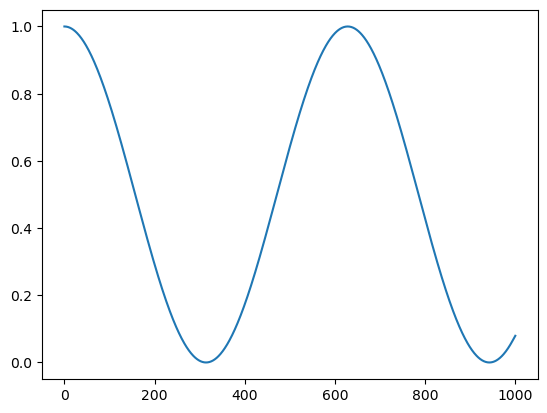

In [5]:
plt.plot(exp[0])
plt.show()

In [6]:
# Now add SPAM errors

config_spam = SimConfig(noise=("SPAM"), eta=0, epsilon=0.1, epsilon_prime=0.1, runs=1, samples_per_run=1000)

In [7]:
sim.set_config(config_spam)
spam_results = sim.run()

In [8]:
spam_exp = spam_results.expect([obs_0])

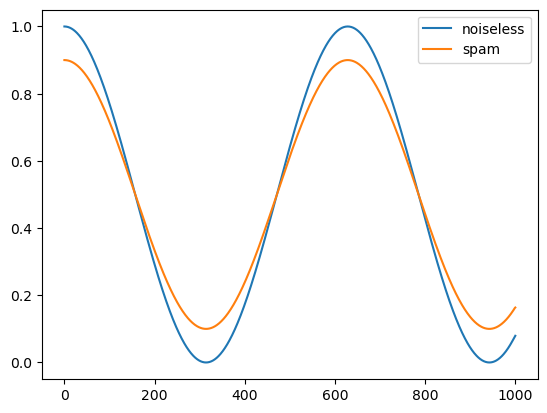

In [9]:
plt.plot(exp[0], label="noiseless")
plt.plot(spam_exp[0], label="spam")
plt.legend()
plt.show()